In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!ls -la ./Data > test.txt

# open the file
with open('test.txt', 'r') as f:
    # read the file
    file = f.read()
    # split the file into a list of lines
    lines = file.split('\n')
    # remove the last element from the list
    lines.pop()
    # print the list
    # print(lines)

lines.pop(0)
lines.pop(0)
lines.pop(0)


# -rw-rw-r-- 1 sakomm sakomm  18838 Jul 14  2020 2C.png

file_names = []
for line in lines:
    file_names.append(line.split(' ')[-1])

# print(file_names)
# print (len(file_names))



In [3]:
def load_grayscale(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

for image in file_names:
    img = load_grayscale('./Data/'+image)
    
    #34 52        106 52
    # 
    # 
    # 
    # 
    # 44 265      106 265
    # 

    grab = img[52:265, 34:106]

    # plt.imshow(grab, cmap='gray')
    # plt.show()

    #save the image grab to a folder called FastData with same name as the original image
    cv2.imwrite('./FastData/'+image, grab)

In [7]:
print(file_names)

['10C.png', '10D.png', '10H.png', '10S.png', '2C.png', '2D.png', '2H.png', '2S.png', '3C.png', '3D.png', '3H.png', '3S.png', '4C.png', '4D.png', '4H.png', '4S.png', '5C.png', '5D.png', '5H.png', '5S.png', '6C.png', '6D.png', '6H.png', '6S.png', '7C.png', '7D.png', '7H.png', '7S.png', '8C.png', '8D.png', '8H.png', '8S.png', '9C.png', '9D.png', '9H.png', '9S.png', 'AC.png', 'AD.png', 'AH.png', 'AS.png', 'JC.png', 'JD.png', 'JH.png', 'JS.png', 'KC.png', 'KD.png', 'KH.png', 'KS.png', 'QC.png', 'QD.png', 'QH.png', 'QS.png']


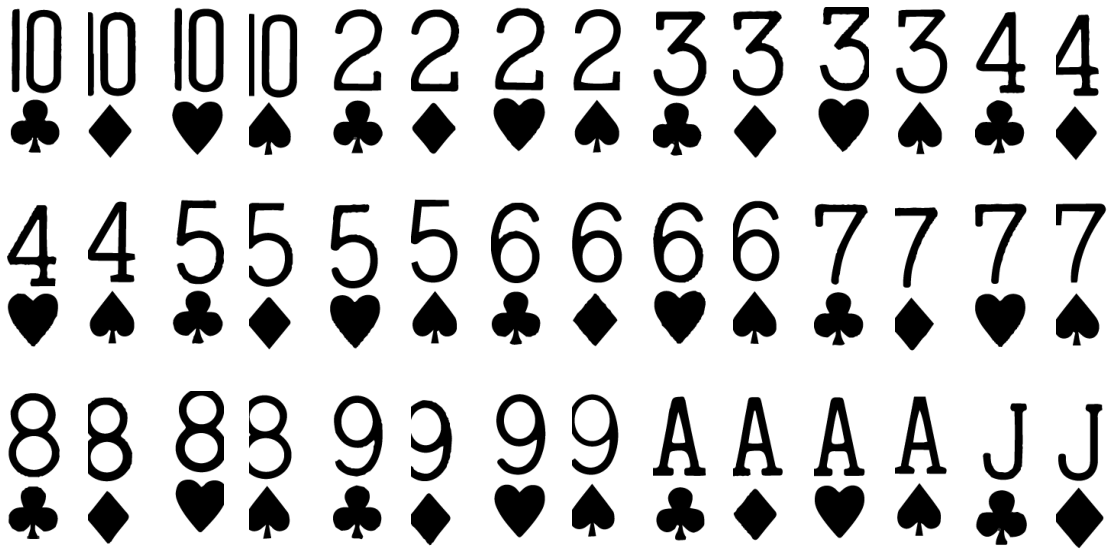

In [4]:

# make 3 x 14 subplots
fig, ax = plt.subplots(3, 14, figsize=(20, 10))
#fill with all the images from the FastData folder
for i in range(3):
    for j in range(14):
        ax[i, j].imshow(load_grayscale('./FastData/'+file_names[i*14+j]), cmap='gray')
        ax[i, j].axis('off')
plt.show()



[ WARN:0@12.520] global shadow_sift.hpp:13 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


Not enough matches are found - 0/15


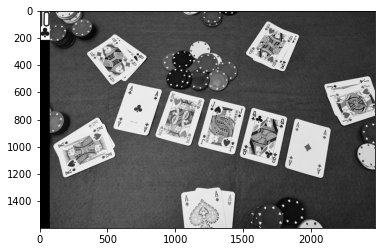

Not enough matches are found - 0/15


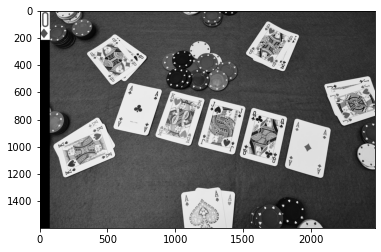

Not enough matches are found - 1/15


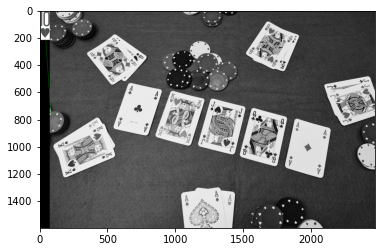

Not enough matches are found - 1/15


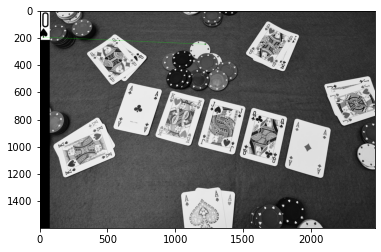

Not enough matches are found - 6/15


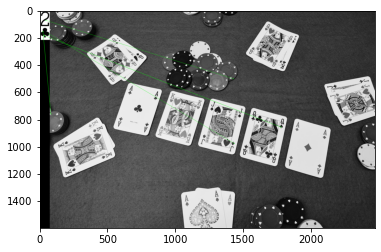

Not enough matches are found - 2/15


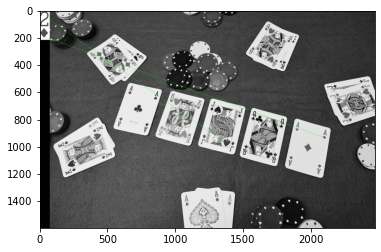

Not enough matches are found - 1/15


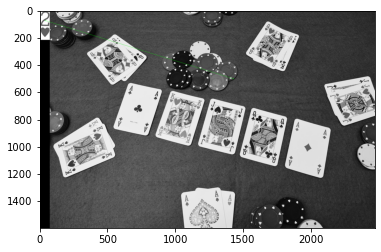

Not enough matches are found - 2/15


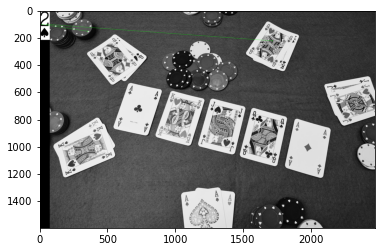

Not enough matches are found - 5/15


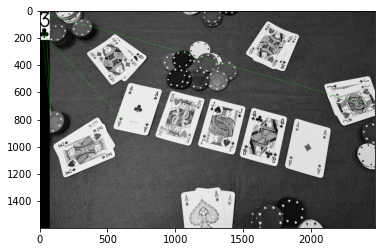

Not enough matches are found - 2/15


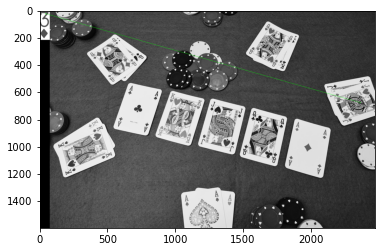

Not enough matches are found - 2/15


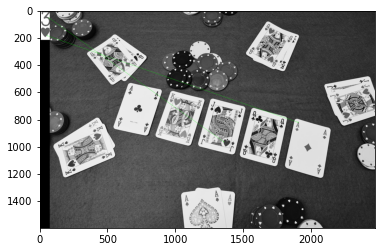

Not enough matches are found - 2/15


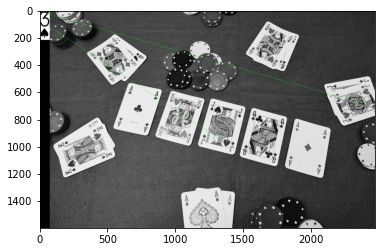

Not enough matches are found - 4/15


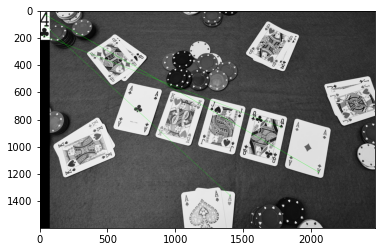

Not enough matches are found - 2/15


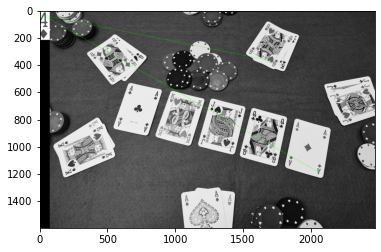

Not enough matches are found - 1/15


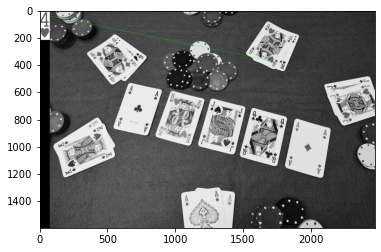

Not enough matches are found - 1/15


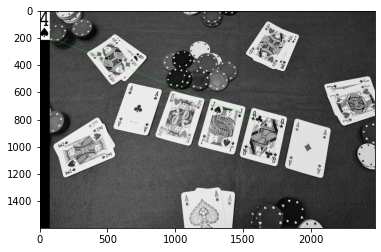

Not enough matches are found - 6/15


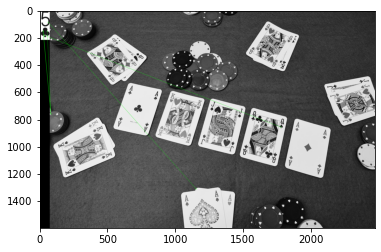

Not enough matches are found - 0/15


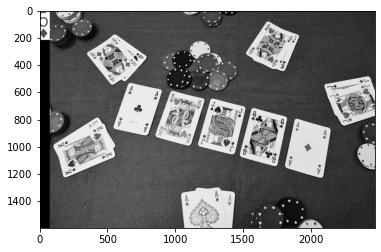

Not enough matches are found - 0/15


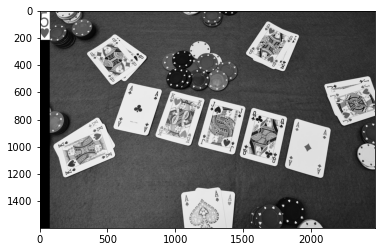

Not enough matches are found - 1/15


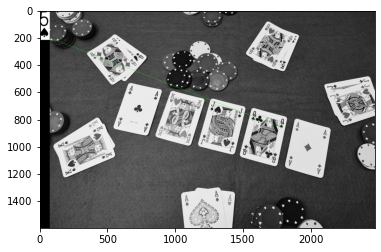

Not enough matches are found - 5/15


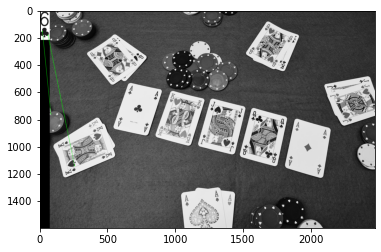

Not enough matches are found - 3/15


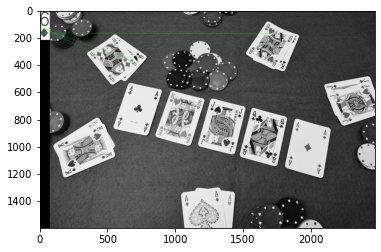

Not enough matches are found - 1/15


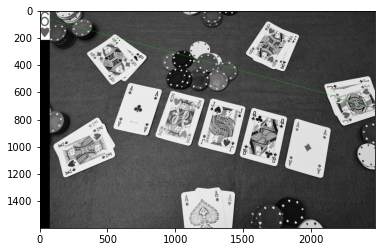

Not enough matches are found - 2/15


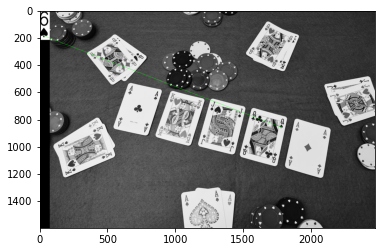

Not enough matches are found - 3/15


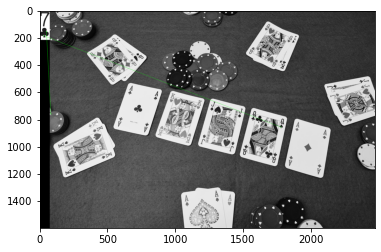

Not enough matches are found - 0/15


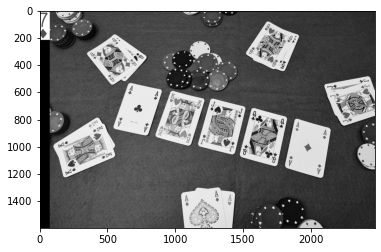

Not enough matches are found - 0/15


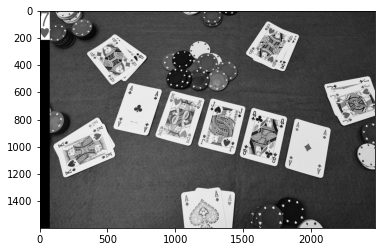

Not enough matches are found - 2/15


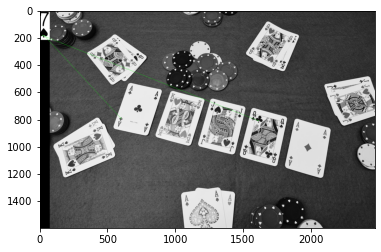

Not enough matches are found - 4/15


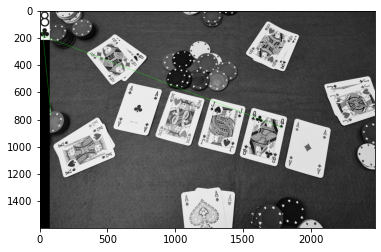

Not enough matches are found - 1/15


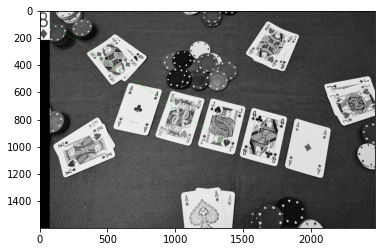

Not enough matches are found - 0/15


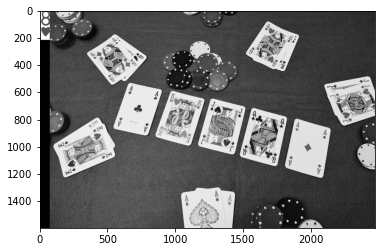

Not enough matches are found - 2/15


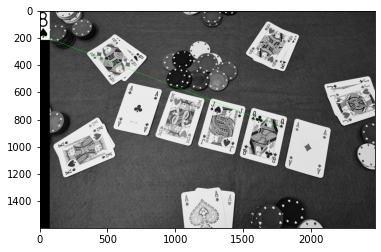

Not enough matches are found - 3/15


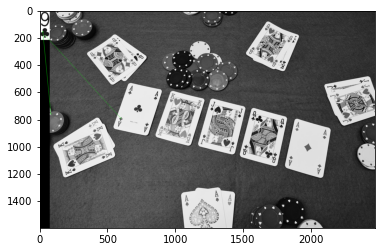

Not enough matches are found - 0/15


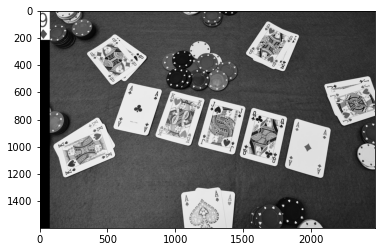

Not enough matches are found - 1/15


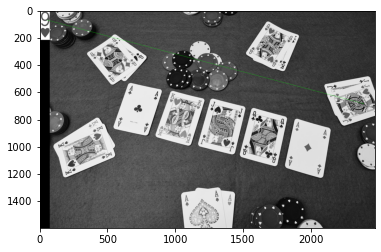

Not enough matches are found - 1/15


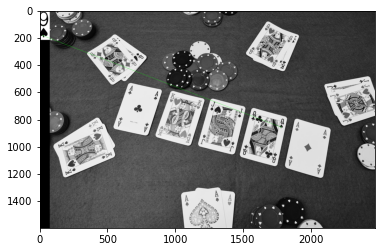

Not enough matches are found - 4/15


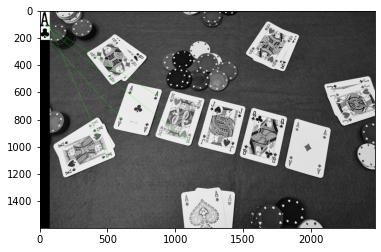

Not enough matches are found - 1/15


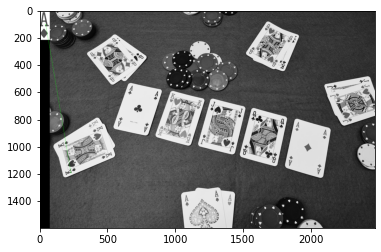

Not enough matches are found - 2/15


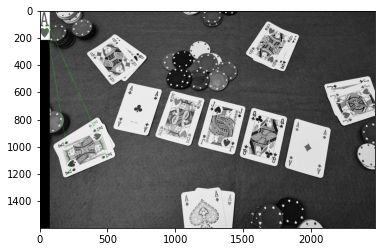

Not enough matches are found - 2/15


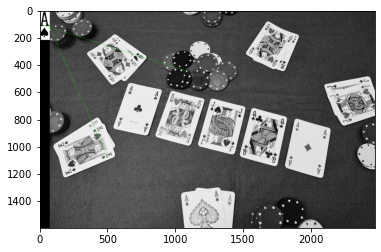

Not enough matches are found - 1/15


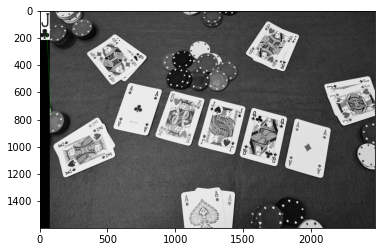

Not enough matches are found - 1/15


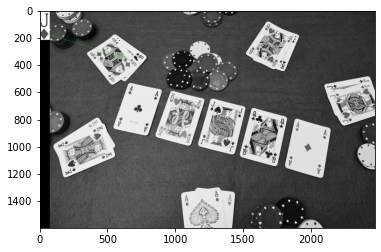

Not enough matches are found - 1/15


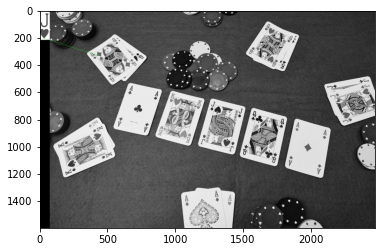

Not enough matches are found - 4/15


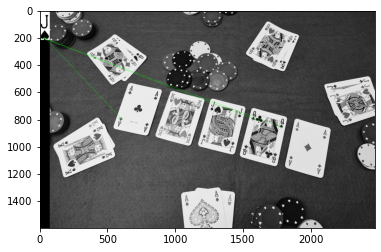

Not enough matches are found - 2/15


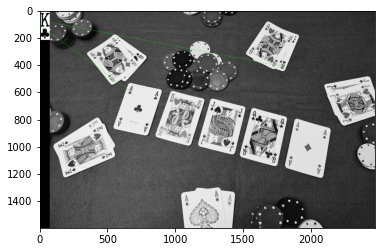

Not enough matches are found - 5/15


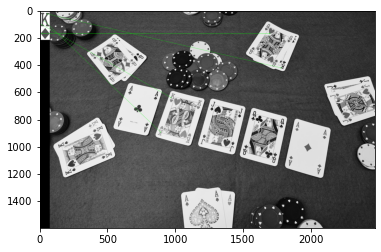

Not enough matches are found - 2/15


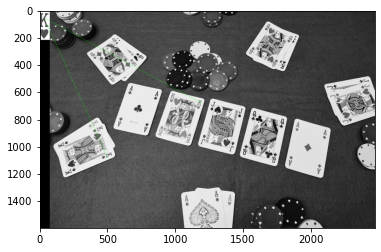

Not enough matches are found - 5/15


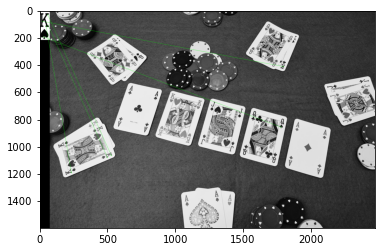

Not enough matches are found - 4/15


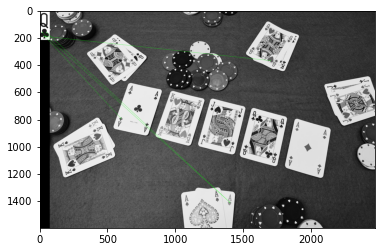

Not enough matches are found - 2/15


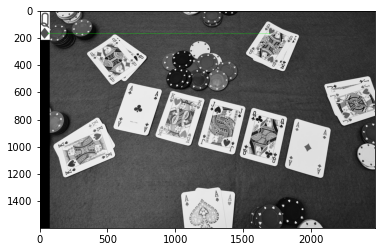

Not enough matches are found - 1/15


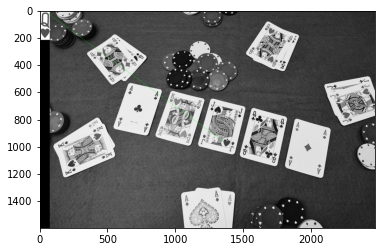

Not enough matches are found - 3/15


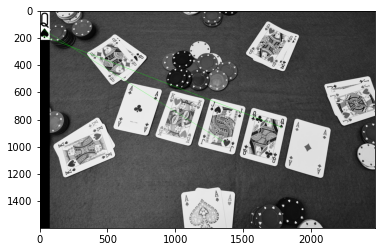

In [6]:
# logo detection using feature matching
MIN_MATCH_COUNT = 15 # minimum number of matches to consider the detection valid

# create a SIFT object
sift = cv2.SIFT_create()

# look through all the images in the FastData folder
for image in file_names:
    kp1, des1 = sift.detectAndCompute(load_grayscale('./FastData/'+image), None)
    # create a list of matches
    matches = []
    # look through all the images in the FastData folder
    im2 = load_grayscale("CardDetectionCode/test_image.png")
    kp2, des2 = sift.detectAndCompute(im2, None)
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5) # number of trees
    search_params = dict(checks = 50) # number of checks

    # create the FLANN object
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    good = []
    for m, n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
    
    if len(good) > MIN_MATCH_COUNT:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

        matchesMask = mask.ravel().tolist()

        h, w = load_grayscale('./FastData/'+image).shape

        pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)

        dst = cv2.perspectiveTransform(pts, M)

        im2 = cv2.polylines(im2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

    else:
        print("Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT))
        matchesMask = None

    draw_params = dict(matchColor = (0, 255, 0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)
    
    img3 = cv2.drawMatches(load_grayscale('./FastData/'+image), kp1, im2, kp2, good, None, **draw_params)
    plt.imshow(img3, 'gray'), plt.show()

     

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
BKG_THRESH = 60
CARD_MAX_AREA = 120000
CARD_MIN_AREA = 25000

def position_image(image):
    """Returns a grayed, blurred, and adaptively thresholded camera image."""

    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)

    # The best threshold level depends on the ambient lighting conditions.
    # For bright lighting, a high threshold must be used to isolate the cards
    # from the background. For dim lighting, a low threshold must be used.
    # To make the card detector independent of lighting conditions, the
    # following adaptive threshold method is used.
    #
    # A background pixel in the center top of the image is sampled to determine
    # its intensity. The adaptive threshold is set at 50 (THRESH_ADDER) higher
    # than that. This allows the threshold to adapt to the lighting conditions.
    img_w, img_h = np.shape(image)[:2]
    bkg_level = gray[int(img_h/100)][int(img_w/2)]
    thresh_level = bkg_level + BKG_THRESH

    retval, thresh = cv2.threshold(blur,thresh_level,255,cv2.THRESH_BINARY)
    
    return thresh

def detect_cards(thresh_image):
    """Finds all card-sized contours in a thresholded camera image.
    Returns the number of cards, and a list of card contours sorted
    from largest to smallest."""

    # Find contours and sort their indices by contour size
    cnts,hier = cv2.findContours(thresh_image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    index_sort = sorted(range(len(cnts)), key=lambda i : cv2.contourArea(cnts[i]),reverse=True)

    # If there are no contours, do nothing
    if len(cnts) == 0:
        return [], []
    
    # Otherwise, initialize empty sorted contour and hierarchy lists
    cnts_sort = []
    hier_sort = []
    cnt_is_card = np.zeros(len(cnts),dtype=int)

    # Fill empty lists with sorted contour and sorted hierarchy. Now,
    # the indices of the contour list still correspond with those of
    # the hierarchy list. The hierarchy array can be used to check if
    # the contours have parents or not.
    for i in index_sort:
        cnts_sort.append(cnts[i])
        hier_sort.append(hier[0][i])

    # Determine which of the contours are cards by applying the
    # following criteria: 1) Smaller area than the maximum card size,
    # 2), bigger area than the minimum card size, 3) have no parents,
    # and 4) have four corners
    actual_cards = []
    for i in range(len(cnts_sort)):
        size = cv2.contourArea(cnts_sort[i])
        peri = cv2.arcLength(cnts_sort[i],True)
        approx = cv2.approxPolyDP(cnts_sort[i],0.01*peri,True)
        
        if ((size < CARD_MAX_AREA) and (size > CARD_MIN_AREA)
            and (hier_sort[i][3] == -1) and (len(approx) == 4)):
            actual_cards.append(cnts_sort[i])
        

    return actual_cards

def return_card(contour, image):
    """Uses contour to find information about the query card. Isolates rank
    and suit images from the card."""
    # Find perimeter of card and use it to approximate corner points
    peri = cv2.arcLength(contour,True)
    approx = cv2.approxPolyDP(contour,0.01*peri,True)
    pts = np.float32(approx)


    # Find width and height of card's bounding rectangle
    x,y,w,h = cv2.boundingRect(contour)

    # Find center point of card by taking x and y average of the four corners.
    average = np.sum(pts, axis=0)/len(pts)
    cent_x = int(average[0][0])
    cent_y = int(average[0][1])

    # Warp card into 200x300 flattened image using perspective transform
    return flatten(image, pts, w, h)

def flatten(image, pts, w, h):
    """Flattens an image of a card into a top-down 200x300 perspective.
    Returns the flattened, re-sized, grayed image.
    See www.pyimagesearch.com/2014/08/25/4-point-opencv-getperspective-transform-example/"""
    temp_rect = np.zeros((4,2), dtype = "float32")
    
    s = np.sum(pts, axis = 2)

    tl = pts[np.argmin(s)]
    br = pts[np.argmax(s)]

    diff = np.diff(pts, axis = -1)
    tr = pts[np.argmin(diff)]
    bl = pts[np.argmax(diff)]

    # Need to create an array listing points in order of
    # [top left, top right, bottom right, bottom left]
    # before doing the perspective transform

    if w <= 0.8*h: # If card is vertically oriented
        temp_rect[0] = tl
        temp_rect[1] = tr
        temp_rect[2] = br
        temp_rect[3] = bl

    if w >= 1.2*h: # If card is horizontally oriented
        temp_rect[0] = bl
        temp_rect[1] = tl
        temp_rect[2] = tr
        temp_rect[3] = br

    # If the card is 'diamond' oriented, a different algorithm
    # has to be used to identify which point is top left, top right
    # bottom left, and bottom right.
    
    if w > 0.8*h and w < 1.2*h: #If card is diamond oriented
        # If furthest left point is higher than furthest right point,
        # card is tilted to the left.
        if pts[1][0][1] <= pts[3][0][1]:
            # If card is titled to the left, approxPolyDP returns points
            # in this order: top right, top left, bottom left, bottom right
            temp_rect[0] = pts[1][0] # Top left
            temp_rect[1] = pts[0][0] # Top right
            temp_rect[2] = pts[3][0] # Bottom right
            temp_rect[3] = pts[2][0] # Bottom left

        # If furthest left point is lower than furthest right point,
        # card is tilted to the right
        if pts[1][0][1] > pts[3][0][1]:
            # If card is titled to the right, approxPolyDP returns points
            # in this order: top left, bottom left, bottom right, top right
            temp_rect[0] = pts[0][0] # Top left
            temp_rect[1] = pts[3][0] # Top right
            temp_rect[2] = pts[2][0] # Bottom right
            temp_rect[3] = pts[1][0] # Bottom left
            
        
    maxWidth = 200
    maxHeight = 300

    # Create destination array, calculate perspective transform matrix,
    # and warp card image
    dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
    M = cv2.getPerspectiveTransform(temp_rect,dst)
    warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    warp = cv2.cvtColor(warp,cv2.COLOR_BGR2GRAY)

        

    return warp
   
#Load in tester image here from filepath
image = cv2.imread("CardDetectionCode/test_image.png")
# print("Image loaded")
# Start timer (for calculating frame rate)

# Pre-process camera image (gray, blur, and threshold it)
pre_proc = position_image(image)

# Find and sort the contours of all cards in the image (query cards)
actual_cards = detect_cards(pre_proc)

# If there are no contours, do nothing
if len(actual_cards) != 0:
    print (str(len(actual_cards)) + " cards detected")
    # Initialize a new "cards" list to assign the card objects.
    # k indexes the newly made array of cards.
    cards = []
    k = 0

    # For each contour detected, the function below returns a 
    #straightened out snapshot of the card. This is all stored in the cards array
    for i in range(len(actual_cards)):
        cards.append(return_card(actual_cards[i],image))
        
    #Displaying the cards that were detected
    for i in range(len(cards)):
        plt.figure()
        plt.imshow(cv2.cvtColor(cards[i], cv2.COLOR_BGR2RGB))


create a SIFT object
sift = cv2.SIFT_create()

# look through all the images in the FastData folder
for image in file_names:
    kp1, des1 = sift.detectAndCompute(load_grayscale_fast(image), None)
    # create a list of matches
    matches = []
    # look through all the images in the FastData folder
    im2 = cv2.imread('./FastData/{test_image.png}')
    kp2, des2 = sift.detectAndCompute(im2, None)
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5) # number of trees
    search_params = dict(checks = 50) # number of checks

    # create the FLANN object
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    good = []
    for m, n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
    
    if len(good) > MIN_MATCH_COUNT:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

        matchesMask = mask.ravel().tolist()

        h, w = load_grayscale_fast(image).shape

        pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)

        dst = cv2.perspectiveTransform(pts, M)

        im2 = cv2.polylines(im2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

    else:
        print("Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT))
        matchesMask = None

    draw_params = dict(matchColor = (0, 255, 0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)
    
    img3 = cv2.drawMatches(load_grayscale_fast(image), kp1, im2, kp2, good, None, **draw_params)
    plt.imshow(img3, 'gray'), plt.show()

     


SyntaxError: invalid syntax (4057269395.py, line 195)